# Near Infrared Spectroscopy Predicts Percentage Crude Protein in Hemp

Grain

Ryan V. Crawford [](https://orcid.org/0009-0006-3052-3269) (Cornell University)  
Jamie Crawford (Cornell University)  
Julie L. Hansen [](https://orcid.org/0000-0001-7247-9186) (Cornell University)  
Lawrence B. Smart [](https://orcid.org/0000-0002-7812-7736) (Cornell AgriTech)  
Virginia Moore [](https://orcid.org/0000-0001-7888-3366) (Cornell University)  
April 3, 2024

Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non proident, sunt in culpa qui officia deserunt mollit anim id est laborum.

In [ ]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Attaching package: 'data.table'

The following objects are masked from 'package:lubridate':

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year

The following objects are masked from 'package:dplyr':

    between, first, last

The following object is masked from 'package:purrr':

    transpose

Loading required package: lattice

Attaching package: 'caret'

The following object is masked from 'package:purrr':

    lift

prospectr version 0.2.7 -- cakes
check the package repository at: https://github.com/l-ramirez-lopez/prospectr


Attaching package: 'pls'

The following object is masked from 'package:prospectr':

    msc

The following object is masked from 'package:caret':

    R2

The following object is masked from 'package:stats':

    loadings

── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──
✔ broom        1.0.5      ✔ rsample      1.2.0 
✔ dials        1.2.1      ✔ tune         1.1.2 
✔ infer        1.0.6      ✔ workflows    1.1.4 
✔ modeldata    1.3.0      ✔ workflowsets 1.0.1 
✔ parsnip      1.2.0      ✔ yardstick    1.3.0 
✔ recipes      1.0.10     
── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ data.table::between()    masks dplyr::between()
✖ scales::discard()        masks purrr::discard()
✖ dplyr::filter()          masks stats::filter()
✖ data.table::first()      masks dplyr::first()
✖ recipes::fixed()         masks stringr::fixed()
✖ dplyr::lag()             masks stats::lag()
✖ data.table::last()       masks dplyr::last()
✖ caret::lift()            masks purrr::lift()
✖ yardstick::precision()   masks caret::precision()
✖ yardstick::recall()      masks caret::recall()
✖ yardstick::sensitivity() masks caret::sensitivity()
✖ yardstick::spec()        ma


Attaching package: 'nlme'

The following object is masked from 'package:dplyr':

    collapse


Attaching package: 'kableExtra'

The following object is masked from 'package:dplyr':

    group_rows

**first draft**

## INTRODUCTION

Hemp (Cannabis sativa L.) is an annual crop with potential uses as a source of food or feed from grain, and bast fiber or hurd from the stalk. Hemp cultivars are commonly grown for one or both purposes and a cultivar may be referred to as a grain, fiber, or dual-purpose type. Because of protein’s nutritional importance, the protein content of a grain crop is an prime consideration for researchers, producers, and consumers. Whole hemp grain typically contains approximately 20-30% protein \[@ely_industrial_2022; @barta_proteomic_2024; @callaway_hempseed_2004\]. Crude protein is often used as a proxy for the direct measurement of protein concentration and consists of the multiplication of nitrogen concentration by a conversion factor, often 6.25 \[@hayes_measuring_2020\]. It may be expressed as a percentage (%CP).

Near-infrared spectroscopy (NIRS) technology is rapid, non-destructive, and cheap. It consists of the measurement of NIR radiation reflected and absorbed from a sample (the spectra) and the relation of the spectra to laboratory values for components such as moisture, protein, fat, or fiber \[@roberts_near-infrared_2004\]. NIRS technology has been used since the 1970’s to assess forage %CP \[@reeves_potential_2012; @williams_application_1975\]. A NIRS calibration set often consists of samples from one species grown in many environments encompassing the range of expected values from the analyte or analytes \[@chadalavada_nir_2022\]. Partial least squares regression (PLSR) is a typical method used in the agricultural and food sciences to relate spectra to analyte \[@roberts_near-infrared_2004\]. PLSR calculates components that maximize covariance between predictor and response variables. PLSR uses some number of components, often selected via cross-validation, in order to fit the regression model and is commonly used in spectroscopy because it tends to work well with highly-correlated, noisy spectral data \[@wold_pls-regression_2001\].

A NIRS-scanned sample of undamaged grain may used for other purposes besides its scan or it may planted as a seed. In wheat and corn, grain protein content has been shown to be heritable \[@giancaspro_genetic_2019; @geyer_genetics_2022\]. This suggests (at least potentially) that NIRS technology could serve as resource to rapidly identify high %CP hemp germplasm, enabling the screening of more germplam as grain, before planting to the field, and thus enabling the efficient development of high %CP hemp grain populations.

For this study, a benchtop NIR spectrometer was used to develop a model to predict %CP content based on a data set of hemp grain representing multiple years, locations, and cultivars from grain and dual-purpose hemp types using PLSR.

## MATERIALS AND METHODS

In [ ]:
# bckgrnd <- fread("./input_data/simplified_data/background_data_set.csv") |> setDT()

# spectra <- fread("./input_data/simplified_data/train_test_crude_protein.csv")

 # bckgrnd[,in_ny:= ifelse(loc!="kentucky", T, F)]
 
# bg2 <- bckgrnd[loc!="kentucky"]

# extract indices of non-kentucky
# bg_indices <- bckgrnd[loc!="kentucky", which = T]

# correct names in bg2--should be h-51, NOT hl-51

# bg2[cultivar=="hl-51"]$cultivar <- "h-51"

# check to see if i did the calc correctly

# bg2[grepl("51", cultivar),]

 #looks good 
# tab <-  table(bckgrnd$in_ny)


# now take correct spectra filtering out stuff from KY

# spectra_2 <- spectra[bg_indices]

In [ ]:
# should be correct finalized data sets, 

# notably, switches sample 2 and 7 around

full_data <- fread("./input_data/final_data_set/full_hemp_data.csv")

tab <-  table(full_data$in_ny)

### Hemp Grain Sample Background

Spectral data were obtained from whole (unground) hemp grain samples, harvested at maturity, collected from 2017 - 2021 from 18 cultivar trials in New York (NY) (149 samples). Grain samples were obtained by hand sampling or mechanical harvest and were cleaned of chaff and dried at 30 C for six days in a forced-air dryer. All %CP values are as percent dry matter. In total, 149 samples from 38 cultivars were represented in the data set. Cultivars were grain or dual-purpose types and included both commercially available and experimental material.

All cultivar trials were planted in randomized complete block design with each cultivar replicated four times. The 2017 data were comprised of samples from the same thirteen cultivars sampled from six NY locations. For those trials, grain was harvested from each plot individually and aggregated by cultivar within each trial. Four subsamples were drawn from each aggregated sample and scanned separately. These spectra were averaged at each 2 nm increment. All remaining samples from 2018-2021 were collected on a per-plot basis. All possible cultivars and possible locations were represented in 2017, but only a selected subset of cultivars and locations were represented in 2018-2021.

### Spectral Data Collection and Preprocessing

A benchtop NIR spectrometer (FOSS/ NIR FOSS/ NIR Systems model 5000) was used to obtain the spectra (FOSS North America, Eden Prairie, MN, USA). Spectra were collected every 2 nm from 1100-2498 nm and the logarithm of reciprocal reflectance was recorded. A 1/4 rectangular sample cup (5.7 cm × 4.6 cm) was used to scan the samples.

WINISI software version 1.02A (Infrasoft International, Port Matilda, PA, USA) was used to average the spectra in 2017, as well as to select samples for laboratory assay. Samples were selected according to their spectral distance from their nearest neighbor within the calibration data set with a cutoff of a distance of 0.6 H, where H is approximately equal to the squared Mahalanobis distance divided by the number of principal components used in the calculation \[@garrido-varo_note_2019\]. Prior to selection selection, spectra were preprocessed using SNV-detrend with settings 1,4,4,1 for the derivative, gap, smooth, and smooth 2 settings respectively.

### Laboratory Validation

Laboratory assays were performed by Dairy One Forage Laboratory (Ithaca, NY). For those assays, 1 mm ground samples were analyzed by combustion using a CN628 or CN928 Carbon/Nitrogen Determinator. Samples from 2017 were aggregated as described above, but the remaining samples were not aggregated.

### Model Development

Training and testing sets were created by dividing the laboratory %CP values into tertiles according to their %CP in order to ensure that the range of %CP values was present in both calibration and testing sets. Within each tertile, 75% of the samples were randomly assigned to the training set and the remaining 25% were assigned to the testing set. For each training set, models were developed in the caret package using PLSR. In fitting the model, the number of components was optimized over a grid search from 1-20. Model performance was evaluated with 25 iterations of bootstrapping and minimized root mean squared error (RMSE) in selecting the number of components in the final model.

In [ ]:
preproc_key <- fread("./input_data/final_data_set/preprocessing_key.csv")

preproc_key[,full_name:= c("Raw Spectra", "First Derivative", "Second Derivative","Savitzky-Golay", "Gap-segment Derivative",
                           "Standard Normal Variate", "Standard Normal Variate following Savitzky-Golay", "Standard Normal Variate-Detrend", "Multiplicative Scatter Correction")]

Initially a number of common spectral preprocessing methods were tested by creating 100 training and testing sets, as described above. Spectral data were transformed by each of the following methods: 1) first derivative, 2) Savitzky-Golay (SG) using the first derivative, third order polynomial, and a window of size 5, 3) gap-segment derivative using the first derivative, a gap of 11, and a segment size of 5, 4) standard normal variate (SNV), 5) standard normal variate following Savitzky-Golay (SNV-SG) using the same SG parameters as above, 6) SNV-detrend with second order polynomial, and 7) multiplicative scatter correction. For comparison, models were also developed using untransformed spectra.

For each of these preprocessing methods, models were fit and predictions were made on the corresponding testing set. Since there were 7 preprocessing methods as well as untransformed spectra, 8 separate models were fit for each of the 100 sets. The relationship between the predicted and actual values of the test set were calculated via RMSE, coefficient of determination (R<sup>2</sup>), relative predicted deviation (RPD), and Ratio of Performance to InterQuartile distance (RPIQ), four common model assessment metrics. Larger R<sup>2</sup>, RPD and RPIQ values and smaller RMSE values are best. The answer to the question of exactly which values constitute a “good” model varies depending upon the reference consulted, but for simplicity’s sake researchers desired a model with R<sup>2</sup> \> 0.80, an RPD greater than 2.5 and ideally greater than 3 (“good” to “excellent” quantitative prediction), and an RPIQ greater than 2.3 but ideally greater than 4.1 prediction on the testing set \[@rawal_visible_2024; @luce_prediction_2017; @chadalavada_nir_2022\].

Analyses of variance (ANOVA) were performed for each of these metrics in order to compare the preprocessing methods. For each ANOVA, each data set was considered as a subject and different variances were allowed for each preprocessing method. Once the most promising preprocessing method was identified, 1000 more training and testing sets were created and models were developed with that method. Performance on the testing sets was summarized with RMSE, R<sup>2</sup>, RPD, and RPIQ. The pattern of errors, expressed as the difference between the actual and predicted values for a given sample, was examined.

### Additional software used

In [ ]:
grateful::cite_packages(output = "paragraph", out.dir = ".",pkgs = c("base", "data.table", "nlme", "tidyverse", "caret", "pls", "prospectr", "tidymodels", "emmeans", "skimr"))

## RESULTS AND DISCUSSION

### Laboratory assay %CP values

In [ ]:
skewness <- function(x) {

    n <- length(x)

    mean_x <- mean(x)
    sd_x <- sqrt(sum((x - mean_x)^2) / (n))

    # z-transform x and assign to z
    z <- (x - mean_x) / sd_x

    # this is not an evaluation, the result is assigned to skewness
    skewness <- sum(z^3) / n

    # we need to evaulate skewness
    # we could write 
    # print(skewness)
    # or
    # return(skewness)
    skewness
}

Laboratory assay %CP values are summarized in the following table. These are similar to the range of %CP values observed in the literature, indicating an reasonable basis for a chemometric model. The %CP values were left-skewed (skewness of -0.29) and two thirds of the samples contained more than 25% CP.

In [ ]:
my_summary <- full_data$crude_protein |> skimr::skim()|> select(c(5:11)) |> 
  mutate_all(round, 1)
names(my_summary) <- c("mean", "sd", "minimum", "first quartile", "median", "third quartile", "maximum") |> str_to_title()

knitr::kable(my_summary)

    Mean    Sd   Minimum   First Quartile   Median   Third Quartile   Maximum
  ------ ----- --------- ---------------- -------- ---------------- ---------
    26.1   2.5      20.8             23.9     26.4             28.2      30.8


### Preprocessing methods comparison

In [ ]:
# 
multi_metric <- metric_set(rmse, rsq, rpiq, rpd)


# read data back in to work with it

prep_key <- fread("./input_data/final_data_set/preprocessing_key.csv")

sims_key <- fread("./input_data/final_data_set/preprocessing_methods_test.csv")

long_form <- merge(sims_key, prep_key, all.x = T)

# now pull the metrics

# long_form[, multi_metric(y, value), by = c("id", "preproc")]

summaries <- long_form |> 
  filter(preproc!="second_derivative") |> 
  group_by(id, preproc) |> 
  multi_metric(y, value)

# # comparing methods over a series of metrics...
# summaries_with_models <- summaries |> 
#   mutate(id = as.character(id)) |> 
#   nest(data = -.metric) |> 
#   mutate(mod = map(data, ~lme4::lmer(.estimate ~ preproc + (1|id), data = .x)),
#          ems = map(mod, ~emmeans::emmeans(.x, "preproc") |> data.frame())
#          )
# 
# summaries_with_models_2 <- summaries_with_models |> 
#   select(1, ems) |> 
#   unnest(ems)

In [ ]:
# actually, let's summarize via nlme
# set our varident
vf2 <- varIdent(form= ~ 1|preproc)

# define custom contrasts
first_part <- rep(1/7,7)
contrast_full <- append(first_part, -1, after = 3)


custom <- list(preprocess_vs_raw = contrast_full)

nlme_summaries <- summaries |> 
  mutate(id = as.character(id)) |> 
  nest(data = -.metric) |> 
  mutate(
    mod_standard = map(data, ~nlme::lme(.estimate ~ preproc, random = ~1|id, data = .x, method ="ML")),
    
    mod_varident = map(data, ~nlme::lme(.estimate ~ preproc, random = ~1|id, weights = vf2, data = .x, method ="ML")),
    mod_compare = map2(mod_standard, mod_varident, ~anova(.x, .y)),
         ems = map(mod_varident, ~emmeans::emmeans(.x, "preproc") |>multcomp::cld() |>  data.frame()), 
             ems2 = map(mod_varident, ~emmeans::emmeans(.x, "preproc")),
                        contrast = map(ems2, ~emmeans::contrast(.x, custom))
                                       )



nlme_summaries_with_models_2 <- nlme_summaries |> 
  select(1, ems) |> 
  unnest(ems)

In [ ]:
# add full names

to_table <- nlme_summaries_with_models_2|> 
  left_join(preproc_key) |> 
  select('Preprocessing Method' = full_name, Metric = .metric, Estimate = emmean, SE) |> 
  mutate(Estimate = paste(format(round(Estimate, 2), nsmall = 2), "±", format(round(SE, 3), nsmall = 3)))

Joining with `by = join_by(preproc)`

In [ ]:
contrasts <- nlme_summaries |> 
  select(.metric, contrast) |> 
  transmute(.metric, tidy_contrast = map(contrast, tidy)) |> 
  unnest(tidy_contrast)

In [ ]:
# lead_lag summaries
lead_lag <- nlme_summaries_with_models_2 |> select(1:4) |> 
  arrange(.metric, emmean)%>% 
  group_by(.metric) |> 
  mutate(lagged = lag(emmean)) %>% 
  mutate(pct_change = (emmean - lagged) / lagged)|> 
  mutate(lead = lead(emmean)) %>% 
  mutate(pct_change_lead = (emmean - lead) / lead)

In [ ]:
# percent change for contrasts

raw_contrast <- nlme_summaries_with_models_2 |> filter(preproc=="raw") |> 
  dplyr::select(1:3) |> 
  left_join(contrasts |> select(1,3,estimated_diff = 5)) |> 
  mutate(percent_difference = estimated_diff/(emmean+estimated_diff))

Joining with `by = join_by(.metric)`

All preprocessing methods outperformed untransformed spectral data @tbl-preproc. Averaged together, all preprocessed spectra were superior to untransformed spectra, with lower RMSE and higher R<sup>2</sup>, RPD and RPIQ values (significant at $\alpha$ level \<0.001). Preprocessing methods had 11.6 % lower RMSE, and had 3.1% higher R<sup>2</sup>, 6.3% higher RPD and7.4% higher RPIQ than unprocessed spectra. Preprocessed spectra also had lower standard errors than untransformed spectra.

The SNV-SG method had the lowest RMSE and the highest R<sup>2</sup>, RPD and RPIQ averaging over all iterations. SNV-SG’s RMSE was 1.4% lower than the next best preprocessing method (SG), while SNV-SG’s R<sup>2</sup>, RPD, and RPIQ were 0.4%, 2.1%, and 2.4% higher than SG respectively. However, the differences between the best and second best methods by metric were only statistically significant at $\alpha$ \<0.05 for RPD and RPIQ. There is a long history of using RPD to evaluate chemometric models although the statistic has been criticized as inadequately reflecting the distribution of skewed populations, a situation which RPIQ was designed to address \[@bellon-maurel_critical_2010\]. Here the data were somewhat but not heavily skewed and RPD and RPIQ metrics were in agreement. The superiority of SNV-SG by these metrics made it the best choice for the final model.

In [ ]:
# printable table of results

to_table2 <- to_table |> 
  mutate(`Preprocessing Method` = 
           case_match(`Preprocessing Method`,
             "Raw Spectra"~ "Untransformed Spectra",
             .default=`Preprocessing Method`
           )) |> 
  select(1:3) |> 
  pivot_wider(names_from = Metric, values_from = Estimate) |> 
  arrange(rmse) |> 
  rename(RMSE = rmse, RPIQ = rpiq ) |> 
  select(1,2,3,5,4)
# names(to_table2)[3] <- "$^{2}$"
to_table2|> 
  knitr::kable(col.names = c("Preprocessing Method", "RMSE",  "$R^{2}$","RPD", "RPIQ"))

  --------------------------------------------------------------------------
  Preprocessing Method               RMSE      $R^{2}$   RPD       RPIQ
  ---------------------------------- --------- --------- --------- ---------
  Standard Normal Variate following  1.02 ±    0.84 ±    2.49 ±    3.97 ±
  Savitzky-Golay                     0.012     0.004     0.032     0.076

  Savitzky-Golay                     1.03 ±    0.83 ±    2.44 ±    3.88 ±
                                     0.012     0.004     0.029     0.072

  First Derivative                   1.07 ±    0.82 ±    2.36 ±    3.77 ±
                                     0.013     0.004     0.032     0.075

  Standard Normal Variate            1.12 ±    0.80 ±    2.26 ±    3.61 ±
                                     0.016     0.005     0.036     0.081

  Gap-segment Derivative             1.12 ±    0.81 ±    2.26 ±    3.60 ±
                                     0.018     0.006     0.040     0.086

  Standard Normal Variate-Detrend    1.13 ±    0.80 ±    2.22 ±    3.55 ±
                                     0.015     0.005     0.035     0.079

  Multiplicative Scatter Correction  1.17 ±    0.79 ±    2.17 ±    3.47 ±
                                     0.016     0.006     0.035     0.080

  Untransformed Spectra              1.22 ±    0.79 ±    2.17 ±    3.42 ±
                                     0.044     0.009     0.052     0.105
  --------------------------------------------------------------------------


These results are not surprising. SNV and SNV-detrend both correct light scatter, which is often a function of differences in particle size and sample packing density, although SNV-detrend is often used for densely-packed, powdered samples \[@barnes_standard_1989\]. SG is a smoothing filter that regresses on the signal over a series of windows, removing noise while preserving the signal’s shape and features \[@li_quantitative_2020; @luo_properties_2005\]. Derivatives, here including SG, gap-segment, and first derivatives pretreatments may remove additive and multiplicative effects, but not necessarily light scatter; as well, derivatives may increase spectral noise \[@rinnan_review_2009\]. Here, hemp grain was neither powdered nor densely packed but samples were subject to light scatter and noise due to differences in particle size in the hemp grain.

The preprocessing methods examined represent a portion of those available. As well, these methods tend to have a number of user-adjustable parameters whose various permutations were not tested. This subset of preprocessing methods and parameters nonetheless contained substantial variations in model quality, demonstrating the importance of selecting an appropriate preprocessing method.

### Final model development and summary

In [ ]:
model_n_comp_statistics <- fread("./input_data/final_data_set/final_model_n_component_stats.csv")

# define a function to calculate percent difference
pct_lower <- function(x){
  my_lag = data.table::shift(x, type = "lag")
  round((x - my_lag)/my_lag*100,2)
}

avg_change <- model_n_comp_statistics[,lapply(.SD, mean),.SDcols = 3:8, by= ncomp]

change_per_pc <- avg_change[, lapply(.SD, pct_lower), .SDcols = 2:7]

The model improved most rapidly as the number of components increased from 1 to 7, with the inclusion of each additional component being associated with a decrease in RMSE of 5-12% . From 8 to 12 components, model performance continued to improve, although gains were more modest (there was a decrease in RMSE of 0.7-3% with the inclusion of each additional component). With 13 or more components, performance gains were minimal and the relative ranks of the models tended to be stable @fig-model-calibration.

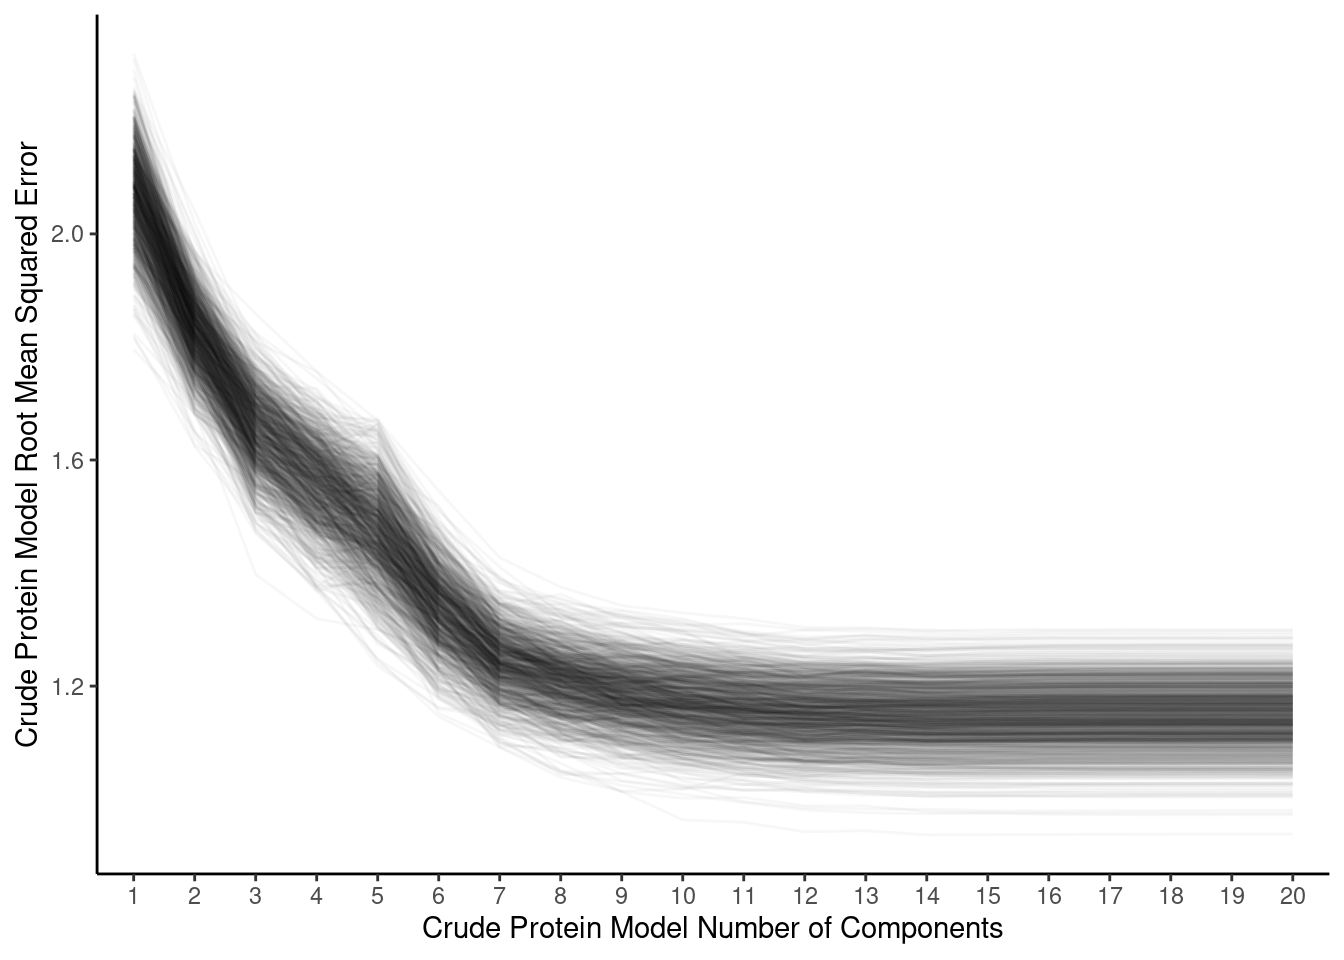

In [ ]:
model_n_comp_statistics |> 
  ggplot(aes(as.factor(ncomp), RMSE)) + 
  geom_line(aes(group = id), alpha = 0.03) + 
  theme_classic() + 
  xlab("Crude Protein Model Number of Components") + 
  ylab("Crude Protein Model Root Mean Squared Error")

In [ ]:
model_final_predictions <- fread("./input_data/final_data_set/final_model_predictions.csv")

final_model_table <- model_final_predictions |> 
  group_by(id) |> 
  multi_metric(crude_protein, predicted_crude_protein) |> setDT()

In [ ]:
# make a final model table that spreads wide

ft2 <- final_model_table[,.estimator:=NULL] |> dcast(id~.metric, value.var = ".estimate")

corr_coeffs <- cor(ft2[,2:5])

# id the very worst fits.
low_cor_ids <- ft2[rsq<0.7,]$id


great_mods <- ft2[rpd>3&rpiq>4.1&rsq>0.8,]

good_mods <- ft2[rpd>2.5&rpd<3&rpiq<4.1&rpiq>2.3&rsq>0.8,]

ok_mods <- ft2[rpd>2.0&rpd<2.5&rpiq>2.3,]

poor_but_functional <-  ft2[rpd>1.5&rpd<2,]

all_mods <- list(great_mods, good_mods, ok_mods, poor_but_functional)

full_sum <- lapply(all_mods, nrow)

The final models performances on the test sets were similar, but not identical to, those obtained during the initial comparison of preprocessing methods. The final models’ mean RMSE was 1.03, R<sup>2</sup> was 0.83, RPD was 2.44, and RPIQ was 3.89. Five percent of the models were excellent by both metrics, with RPD \> 3 and RPIQ \> 4.1, while an additional 11% of the models were “good” by both metrics (RPD range from 2.5 - 3.0, RPIQ range from 2.3 - 4.1). Forty-nine percent of the models had the ability to approximate quantitative prediction (RPD range from 2.0 - 2.5), and 9% of the models were able to distinguish between higher and lower %CP values (RPD range from 1.5 - 2.0). Therefore, 74% of the models had, at minimum, the ability to distinguish between high and low values with with two thirds of them having, at minimum, the ability to approximate quantitative prediction. Despite the generally good model performance, a subset of poor models can be seen. For example, @fig-final-metric-boxplot shows twenty-one models with R<sup>2</sup> below 0.7.

In [ ]:
skim_metrics <- final_model_table |> 
  group_by(.metric) |> 
  skimr::skim()

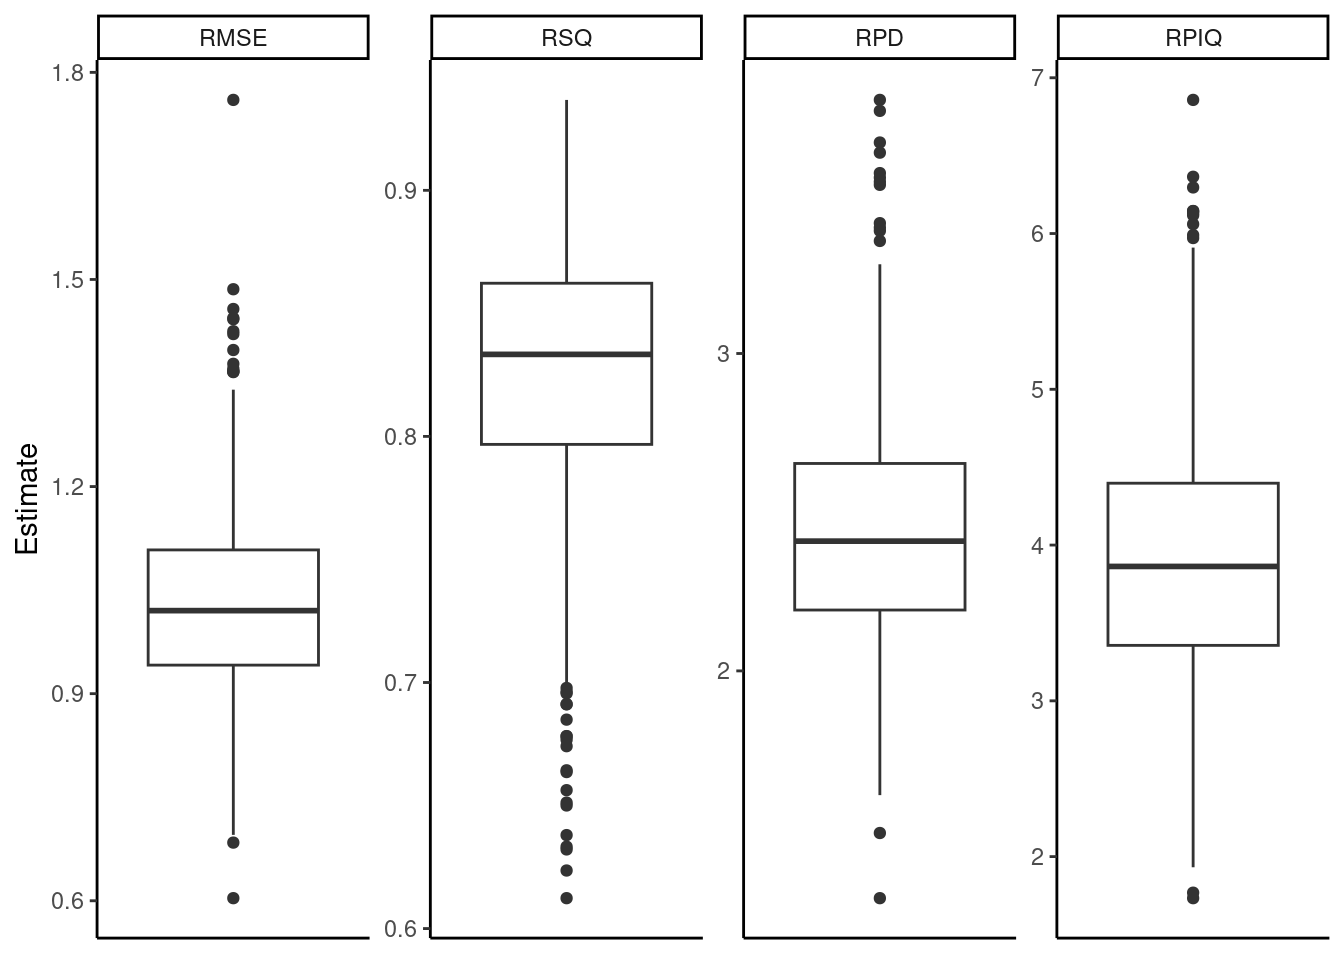

In [ ]:
# setnames(model_final_predictions, "V1", "crude_protein")



final_model_table |>
  mutate(metric2 = toupper(.metric)) |> 
  ggplot(aes(x = .metric, y = .estimate)) + 
  theme_classic() + geom_boxplot() + 
  facet_wrap(nrow = 1,vars(factor(metric2, levels = c("RMSE", "RSQ","RPD", "RPIQ"))), scales = "free") +
  xlab("Metric") + ylab("Estimate")+
  theme(
    axis.title.x = element_blank(),
    axis.text.x = element_blank(),
    axis.ticks.x = element_blank())

In [ ]:
# add difference calculation between predicted and observed...
model_final_predictions[,difference := predicted_crude_protein - crude_protein]

In [ ]:
# my_cut <- cut(spectra_2$crude_protein, 3)
# cut_dt <- data.table(ith_in_data_set = 1:149, cutpoints = my_cut)


# revised_model_cutpoints
cutpoints2 <- model_final_predictions |> 
  distinct(ith_in_data_set, crude_protein) |> 
  mutate(cutpoints = cut(crude_protein, 3)) |> 
  arrange(crude_protein) |> 
  mutate(plot_order = 1:n())

In [ ]:
data_sum_by_sample <- model_final_predictions[,lapply(.SD, mean), .SDcols = c("crude_protein", "difference"), by = "ith_in_data_set"]
setorder(data_sum_by_sample, crude_protein)
temp_dat <- copy(data_sum_by_sample)
# create temporary ith
temp_dat[,tmp_ith:= 1:.N]
min_val <- min(temp_dat$crude_protein)
# center this
temp_dat[,adj_cp:= crude_protein - min_val]

lm_mod <- lm(difference~adj_cp, data = temp_dat) 
lm_mod_sum <- summary(lm_mod)

coefs <- coef(lm_mod)

preds <- predict(lm_mod, temp_dat)
ds_preds <- temp_dat[,c("ith_in_data_set")] |> cbind(preds)

ds_cutpoints <- merge(ds_preds, cutpoints2)
setorder(ds_cutpoints, plot_order)

In [ ]:
sd_mod <- model_final_predictions[,list(sd_diff = sd(difference), crude_protein = mean(crude_protein)), by = "ith_in_data_set"]
setorder(sd_mod, crude_protein)
temp_dat_sd <- copy(sd_mod)
# create temporary ith
temp_dat_sd[,tmp_ith:= 1:.N]
min_val_sd <- min(temp_dat_sd$crude_protein)
# center this
temp_dat_sd[,adj_cp:= crude_protein - min_val]

lm_mod_sd <- lm(sd_diff~adj_cp, data = temp_dat_sd) 

In [ ]:
# look at worst samples info...

worst_preds <- model_final_predictions[id%in%low_cor_ids]

worst <- worst_preds[,.N, by = ith_in_data_set][order(N, decreasing = T)][N>8]

troubles <- merge(worst, full_data[,1:7], all.x = T)

In [ ]:
cts <- ds_cutpoints[,mean(preds), by=cutpoints]

Finally, the pattern of test set errors was examined on a per-sample basis by calculating the difference between the actual and predicted values for the samples in the test sets @fig-validation_set_performance . A linear model was fit considering the mean estimated error for each sample where that sample was in the test set as compared to the sample’s actual value. The models overestimated %CP by approximately 0.5 % in the lowest tertile and underestimated %CP by -0.01 % and -0.41 % in the middle and highest tertile, respectively. The variance of the errors did not increase appreciably as %CP increased.

Joining with `by = join_by(crude_protein, ith_in_data_set)`

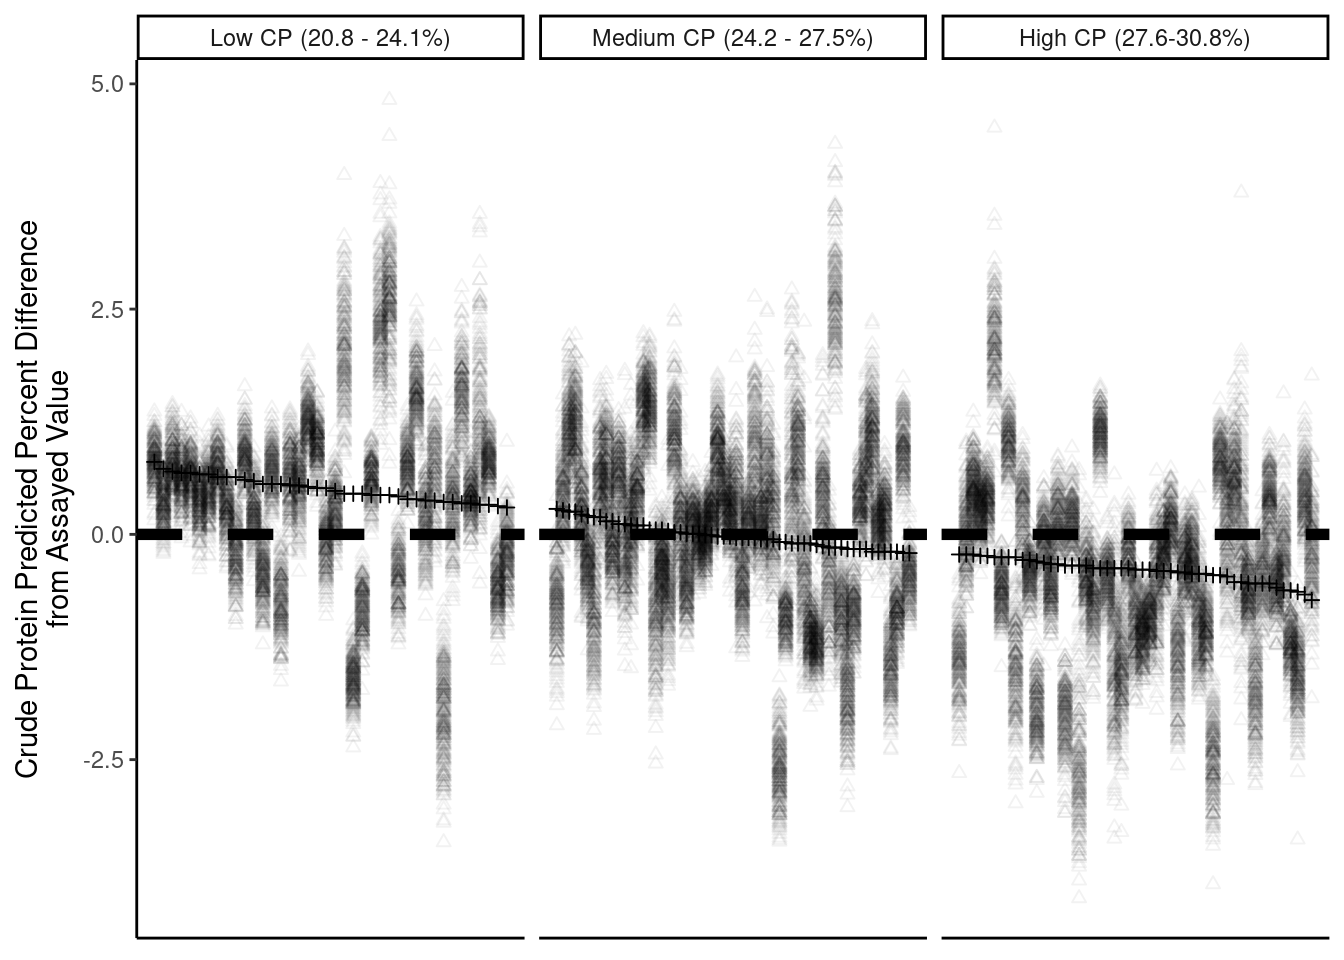

In [ ]:
# 

model_final_predictions |> 
  left_join(cutpoints2) |> 
  arrange(plot_order) |> 
  ggplot(aes(plot_order, crude_protein))+
  geom_point(aes(plot_order, difference), alpha = 0.05, shape = 2) +
  geom_hline(yintercept = 0, linewidth = 2, lty = 2) +
  geom_point(data = ds_cutpoints, aes(plot_order, preds), shape = 3)+
  facet_wrap( ~cutpoints, scales = "free_x",
              labeller = as_labeller(c("(20.8,24.1]" = "Low CP (20.8 - 24.1%)",
                                       "(24.1,27.5]"= "Medium CP (24.2 - 27.5%)",
                                       "(27.5,30.8]" ="High CP (27.6-30.8%)")))+ 
  ylab("Crude Protein Predicted Percent Difference\nfrom Assayed Value")+
  theme_classic()+
  theme(
    axis.title.x = element_blank(),
    axis.text.x = element_blank(),
    axis.ticks.x = element_blank()) 

In [ ]:
# look
# read in stuff for supplemental table first
supp_tab <- fread("./input_data/final_data_set/cultivar_table_clean.csv")

# read in correct location key
locs2 <- fread("./input_data/final_data_set/corrected_location_key.csv")

# sort highest and lowest samples...
td2 <- temp_dat[order(abs(difference))]

# sort highest and lowest
td3 <- td2[!c(16:134),][,grouping:=rep(c("best_predicted_10pct", "worst_predicted_10_pct"), each = 15)]

# incorporate background

td4_bckgrd <- merge(td3, full_data[,1:7], all.x = T)

td_5 <- merge( td4_bckgrd,locs2, by.y ="loc", by.x= 'loc', all.x = T)


# make a prop table.
td_5_table <-  with(td_5, table(grouping, loc2))

test_for_errors <- merge( merge(td2, full_data[,1:7], all.x = T),locs2, by.y ="loc", by.x= 'loc', all.x = T)

error_mod <- lm(abs(difference)~loc2, data = test_for_errors)

error_by_loc <- emmeans::emmeans(error_mod, "loc2") |> multcomp::cld()

The 15 (10%) best and 15 worst predicted samples as measured by the mean absolute error of prediction were identified and their backgrounds examined. Overall, half of the samples in the data set came from Ithaca, NY (“Ithaca”), while 28% were collected from Geneva, NY (“Geneva”) @tbl-hemp_provenance. However, of the 15 worst-predicted samples, 9 were from Geneva, while 3 of the 15 best-predicted samples were from Geneva (by contrast, 7 of the best-predicted and 5 of the worst-predicted samples came from Ithaca). Overall, samples from Geneva had the highest mean absolute error of prediction among locations, 61% greater than samples from Ithaca and 155% greater than samples from Freeville, NY (the only locations with more than 20 samples).

This study is limited in that it represents the creation of one model based upon spectra collected from one machine. NIRS calibrations can be unique to a particular machine, even if the machines compared are of the same model \[@reeves_potential_2012\]. As well, the calibration and validation sets are relatively small.

This research showed the promise of the use of NIRS in order to make predictions concerning %CP in hemp grain using PLS. Promising preprocessing methods were identified and a model was validated. Further research could refine a %CP model by including more samples, particularly by rectifying the class imbalance between Geneva and Ithaca, identifying promising spectral regions, or by examining other predictive methods.

## ACKNOWLEDGMENTS

This work would not have been possible without the efforts of the field staff, undergraduate, and graduate students who planted, maintained, monitored and harvested these trials.

## CONFLICT OF INTEREST

The authors declare no conflict of interest.

## ORCID

## SUPPLEMENTAL MATERIAL

In [ ]:
supp_tab2 <- copy(supp_tab)

supp_tab2[,Cultivar:=toupper(cultivar2)]
names(supp_tab2) <- str_to_title(names(supp_tab2))
# get one that's sortable
st3 <- supp_tab2[,c(8,2:7)]
options(knitr.kable.NA = '')
knitr::kable(st3)

  Cultivar             Chazy   Freeville   Geneva   Ithaca   Willsboro   Total
  ------------------ ------- ----------- -------- -------- ----------- -------
  ALTAIR                                                 1                   1
  ANKA                                 1        3        5           2      11
  BIALOBRZESKIE                        1        3        4           1       9
  CANDA                                1        1        1                   3
  CFX-1                                1        2        5                   8
  CFX-2                                1        2        4                   7
  CRS-1                    1           1        2        5                   9
  CULTIVAR1                            1                                     1
  CULTIVAR2                                              1                   1
  CULTIVAR3                                              1                   1
  CULTIVAR4                                              1                   1
  EARLINA 8                                     1                            1
  EXPERIMENTAL1                                          1                   1
  EXPERIMENTAL2                                          1                   1
  FELINA 32                            1        2        3                   6
  FUTURA 75                            1        3        4                   8
  GRANDI                               3        3        4                  10
  H-51                                          1        2                   3
  HAN-FN-H                                               1                   1
  HAN-NW                                                 1                   1
  HELENA                               1                                     1
  HENOLA                                                 2                   2
  HLESIA                                                 3                   3
  HLIANA                                        1        1                   2
  JOEY                                 1        1        1                   3
  KATANI                               2        3        4                   9
  NEBRASKA (FERAL)         1                             1                   2
  PEWTER RIVER                         1                                     1
  PICOLO                               1        2        5                   8
  PORTUGAL                                      1                            1
  ROCKY HEMP                                    1                            1
  STERLING GOLD                                 1                            1
  SWIFT                    1           1                 1                   3
  TYGRA                                1        3        4                   8
  USO-31                   2           1        2        4                   9
  WOJKO                                1        3        4                   8
  X-59                                 2                 1                   3
  TOTAL                    5          24       41       76           3     149


## OPTIONAL SECTIONS

## REFERENCES

## FIGURES AND TABLES